## Analyse Data

In this phase, analyzing data involves cleaning messy text datasets to prepare them for analysis, then employing techniques such sentiment analysis, or word clouds to uncover insights within the data.




In [1]:
#imports

import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('C:/Data Science - British Airways/Data/data_airline-reviews(British Airways).xlsx')
df.head()

,Rating,Title,Author,Date,Country,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
0,8.0,"""stick to their cabin bag size limit""",4 reviews\n\n\n\nMichael Powell,2024-03-21,United Kingdom,Not Verified | The flight was comfortable eno...,A320,Solo Leisure,Economy Class,London Heathrow to Toulouse,March 2024,yes,4.0,4.0,3.0,3,NaN,NaN,NaN
1,8.0,"""crew were attentive, friendly""",N Wardan,2024-03-21,Canada,✅ Trip Verified | We had a really good flying...,Boeing 787-8 /777-200 / A320-200,Family Leisure,Economy Class,Montreal to Venice via London Heathrow,March 2024,yes,4.0,5.0,3.0,4,5.0,4.0,NaN
2,3.0,"""Utterly outrageous""",Solomon Pachtinger,2024-03-19,United Kingdom,✅ Trip Verified | Waited an hour to check-in ...,A321,Business,Business Class,Paphos to London,March 2024,no,2.0,1.0,1.0,1,2.0,1.0,2.0
3,3.0,"""They have a long way to go""",Paul Roberts,2024-03-19,Singapore,Not Verified | Not a great experience at all...,Boeing 777-300,Business,Business Class,London to Houston,March 2024,no,1.0,3.0,1.0,1,3.0,2.0,2.0
4,7.0,"""FA's were friendly""",42 reviews\n\n\n\nE Carmere,2024-03-14,Belgium,✅ Trip Verified | Boarding was difficult caus...,A320,Solo Leisure,Business Class,London Heathrow to Brussels,March 2024,yes,2.0,4.0,3.0,3,3.0,NaN,NaN


In [3]:
# List to store verification statuses
verification_statuses = []

# Iterating through each review
for review in df['Review']:
    # Checking if the review starts with the symbol ✅
    if review.startswith("✅"):
        verification_statuses.append("Trip Verified")
    else:
        verification_statuses.append("Not Verified")

df['Verification Status'] = verification_statuses

# Replace the phrases "✅ Trip Verified |" or "Not Verified |" with an empty string
df['Review'] = df['Review'].str.replace('✅ Trip Verified |', '', regex = True)
df['Review'] = df['Review'].str.replace('Not Verified |', '', regex = True)

df

,Rating,Title,Author,Date,Country,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,Verification Status
0,8.0,"""stick to their cabin bag size limit""",4 reviews\n\n\n\nMichael Powell,2024-03-21,United Kingdom,| The flight was comfortable enough but with ...,A320,Solo Leisure,Economy Class,London Heathrow to Toulouse,March 2024,yes,4.0,4.0,3.0,3,NaN,NaN,NaN,Not Verified
1,8.0,"""crew were attentive, friendly""",N Wardan,2024-03-21,Canada,| We had a really good flying experience with...,Boeing 787-8 /777-200 / A320-200,Family Leisure,Economy Class,Montreal to Venice via London Heathrow,March 2024,yes,4.0,5.0,3.0,4,5.0,4.0,NaN,Trip Verified
2,3.0,"""Utterly outrageous""",Solomon Pachtinger,2024-03-19,United Kingdom,| Waited an hour to check-in at the Paphos bu...,A321,Business,Business Class,Paphos to London,March 2024,no,2.0,1.0,1.0,1,2.0,1.0,2.0,Trip Verified
3,3.0,"""They have a long way to go""",Paul Roberts,2024-03-19,Singapore,"| Not a great experience at all, from the ou...",Boeing 777-300,Business,Business Class,London to Houston,March 2024,no,1.0,3.0,1.0,1,3.0,2.0,2.0,Not Verified
4,7.0,"""FA's were friendly""",42 reviews\n\n\n\nE Carmere,2024-03-14,Belgium,| Boarding was difficult caused by vast major...,A320,Solo Leisure,Business Class,London Heathrow to Brussels,March 2024,yes,2.0,4.0,3.0,3,3.0,NaN,NaN,Trip Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,1.0,British Airways customer review,J Robertson,2012-08-29,United Kingdom,This was a bmi Regional operated flight on a R...,NaN,NaN,Economy Class,NaN,NaN,no,3.0,1.0,NaN,3,2.0,0.0,NaN,Not Verified
3767,9.0,British Airways customer review,Nick Berry,2012-08-28,United Kingdom,LHR to HAM. Purser addresses all club passenge...,NaN,NaN,Business Class,NaN,NaN,yes,4.0,5.0,NaN,3,4.0,0.0,NaN,Not Verified
3768,5.0,British Airways customer review,Avril Barclay,2011-10-12,United Kingdom,My son who had worked for British Airways urge...,NaN,NaN,Economy Class,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,NaN,NaN,Not Verified
3769,4.0,British Airways customer review,C Volz,2011-10-11,United States,London City-New York JFK via Shannon on A318 b...,NaN,NaN,Premium Economy,NaN,NaN,no,1.0,3.0,NaN,1,5.0,0.0,NaN,Not Verified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  3766 non-null   float64
 1   Title                   3771 non-null   object 
 2   Author                  3771 non-null   object 
 3   Date                    3771 non-null   object 
 4   Country                 3771 non-null   object 
 5   Review                  3771 non-null   object 
 6   Aircraft                1964 non-null   object 
 7   Type Of Traveller       3000 non-null   object 
 8   Seat Type               3769 non-null   object 
 9   Route                   2996 non-null   object 
 10  Date Flown              2993 non-null   object 
 11  Recommended             3771 non-null   object 
 12  Seat Comfort            3651 non-null   float64
 13  Cabin Staff Service     3639 non-null   float64
 14  Ground Service          2923 non-null   

In [5]:
# Viewing the count of unique values in each column
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print()

Value counts for column 'Rating':
1.0     885
2.0     433
3.0     419
8.0     375
10.0    332
7.0     317
9.0     313
4.0     254
5.0     239
6.0     199
Name: Rating, dtype: int64

Value counts for column 'Title':
British Airways customer review        956
"never fly British Airways again"        6
"Overall a good flight"                  5
"I was pleasantly surprised"             4
"service was good"                       3
                                      ... 
"trying to seat together"                1
"couple of very good flights"            1
"service on this flight was superb"      1
"Very nice experience"                   1
"cannot fault the service"               1
Name: Title, Length: 2747, dtype: int64

Value counts for column 'Author':
E Smyth                          32
Clive Drake                      32
31 reviews\n\n\n\nDavid Ellis    27
David Ellis                      16
R Vines                          14
                                 ..
W Gale               

In [6]:
# Percentage of Missing Value
percentage_nan = df.isna().mean() * 100
percentage_nan

Rating                     0.132591
Title                      0.000000
Author                     0.000000
Date                       0.000000
Country                    0.000000
Review                     0.000000
Aircraft                  47.918324
Type Of Traveller         20.445505
Seat Type                  0.053036
Route                     20.551578
Date Flown                20.631132
Recommended                0.000000
Seat Comfort               3.182180
Cabin Staff Service        3.500398
Ground Service            22.487404
Value For Money            0.000000
Food & Beverages          10.633784
Inflight Entertainment    31.079289
Wifi & Connectivity       83.134447
Verification Status        0.000000
dtype: float64

In [7]:
# Assuming df is already defined or imported
review = pd.DataFrame()  # Creating an empty DataFrame

# Assuming df['Review'] is a column in DataFrame df
review['Review'] = df['Review']

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import pipeline
import tensorflow as tf  
import tf_keras as keras
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

# Load model for Named Entity Recognition (NER)
ner_model = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)

# Define text preprocessing functions
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub(r'\n', ' ', text)  # Remove any '\n'
    text = re.sub(r' +', ' ', text)  # Remove extra spaces
    return text.strip()

def remove_nonaplhanumeric(text):
    text = re.sub(r'[^a-zA-Z]+', ' ', text)  # Remove non-alphanumeric characters
    return text

def remove_stopword(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Function to remove named entities using BERT NER
def remove_named_entities_bert(text):
    # Process text using BERT NER
    entities = ner_model(text)

    # Extract named entities
    named_entities = [entity['word'] for entity in entities if entity['word'] != '']

    # Remove named entities from text
    for entity in named_entities:
        text = text.replace(entity, '')

    return text

# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Complete text preprocessing
def preprocess(text):
    text = remove_nonaplhanumeric(text)  # Remove non-alphanumeric characters
    text = remove_named_entities_bert(text) # Remove named entities (NER)
    text = remove_unnecessary_char(text)  # Remove unnecessary characters
    text = lowercase(text)  # Lowercase text
    text = remove_stopword(text)  # Remove stop words and entities
    text = lemmatize_text(text)  # Perform lemmatization
    return text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect 

In [9]:
review['Review_clean'] = review['Review'].apply(preprocess)

In [10]:
review

,Review,Review_clean
0,| The flight was comfortable enough but with ...,flight comfortable enough hour delay return le...
1,| We had a really good flying experience with...,really good flying experience travelling young...
2,| Waited an hour to check-in at the Paphos bu...,waited hour check business check staff utterly...
3,"| Not a great experience at all, from the ou...",great experience outset poorly managed bused u...
4,| Boarding was difficult caused by vast major...,boarding difficult caused vast majority passen...
...,...,...
3766,This was a bmi Regional operated flight on a R...,bmi operated flight j flight number report boa...
3767,LHR to HAM. Purser addresses all club passenge...,hr ham urser address club passenger name board...
3768,My son who had worked for British Airways urge...,son worked urged fly recommended join executiv...
3769,London City-New York JFK via Shannon on A318 b...,via really nice seat professional crew al serv...


In [11]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

review['Sentiment_Vader'] = review['Review_clean'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Function to classify sentiment into positive, negative, or neutral categories
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to the 'Sentiment' column to create a new column 'Sentiment_Category'
review['Sentiment_Category_Vader'] = review['Sentiment_Vader'].apply(classify_sentiment)
print(review.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Review  \
0  |  The flight was comfortable enough but with ...   
1  |  We had a really good flying experience with...   
2  |  Waited an hour to check-in at the Paphos bu...   
3  |   Not a great experience at all, from the ou...   
4  |  Boarding was difficult caused by vast major...   

                                        Review_clean  Sentiment_Vader  \
0  flight comfortable enough hour delay return le...           0.3182   
1  really good flying experience travelling young...           0.9802   
2  waited hour check business check staff utterly...          -0.8706   
3  great experience outset poorly managed bused u...           0.7003   
4  boarding difficult caused vast majority passen...           0.9178   

  Sentiment_Category_Vader  
0                 Positive  
1                 Positive  
2                 Negative  
3                 Positive  
4                 Positive  


In [12]:
review

,Review,Review_clean,Sentiment_Vader,Sentiment_Category_Vader
0,| The flight was comfortable enough but with ...,flight comfortable enough hour delay return le...,0.3182,Positive
1,| We had a really good flying experience with...,really good flying experience travelling young...,0.9802,Positive
2,| Waited an hour to check-in at the Paphos bu...,waited hour check business check staff utterly...,-0.8706,Negative
3,"| Not a great experience at all, from the ou...",great experience outset poorly managed bused u...,0.7003,Positive
4,| Boarding was difficult caused by vast major...,boarding difficult caused vast majority passen...,0.9178,Positive
...,...,...,...,...
3766,This was a bmi Regional operated flight on a R...,bmi operated flight j flight number report boa...,0.3182,Positive
3767,LHR to HAM. Purser addresses all club passenge...,hr ham urser address club passenger name board...,0.7650,Positive
3768,My son who had worked for British Airways urge...,son worked urged fly recommended join executiv...,0.7003,Positive
3769,London City-New York JFK via Shannon on A318 b...,via really nice seat professional crew al serv...,0.8070,Positive


In [13]:
from afinn import Afinn

# Membuat objek Afinn
afinn = Afinn()

# Function to classify sentiment into positive, negative, or neutral categories
def classify_sentiment(score):
    if score >= 3:
        return 'Positive'
    elif score <= -3:
        return 'Negative'
    else:
        return 'Neutral'

# Menggunakan fungsi Afinn untuk menghitung skor sentimen dan mengklasifikasikannya
review['Sentiment_Afinn'] = review['Review_clean'].apply(lambda x: afinn.score(x))
review['Sentiment_Category_Afinn'] = review['Sentiment_Afinn'].apply(classify_sentiment)


In [14]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize

# Pastikan Anda telah mengunduh paket yang diperlukan
nltk.download('punkt')
nltk.download('sentiwordnet')

# Fungsi untuk mendapatkan skor sentimen dari teks menggunakan SentiWordNet
def get_sentiment_score(text):
    total_score = 0
    tokens_count = 0
    tokens = word_tokenize(text)
    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        if synsets:
            # Ambil sentimen dari synset pertama
            synset = synsets[0]
            # Hitung skor sentimen
            sentiment_score = synset.pos_score() - synset.neg_score()
            # Tambahkan skor sentimen ke total
            total_score += sentiment_score
            # Hitung jumlah token yang memiliki sentimen
            tokens_count += 1
    # Hitung rata-rata skor sentimen jika ada token yang memiliki sentimen
    if tokens_count > 0:
        average_score = total_score / tokens_count
        return average_score
    else:
        return 0  # Jika tidak ada token dengan sentimen, kembalikan skor nol

# Terapkan fungsi pada kolom 'Review_clean'
review['Sentiment_SentiWordNet'] = review['Review_clean'].apply(get_sentiment_score)

# Klasifikasikan sentimen
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Terapkan fungsi klasifikasi pada kolom 'Sentiment_SentiWordNet' untuk mendapatkan kategori sentimen
review['Sentiment_Category_SentiWordNet'] = review['Sentiment_SentiWordNet'].apply(classify_sentiment)

# Tampilkan beberapa contoh data
print(review.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


                                              Review  \
0  |  The flight was comfortable enough but with ...   
1  |  We had a really good flying experience with...   
2  |  Waited an hour to check-in at the Paphos bu...   
3  |   Not a great experience at all, from the ou...   
4  |  Boarding was difficult caused by vast major...   

                                        Review_clean  Sentiment_Vader  \
0  flight comfortable enough hour delay return le...           0.3182   
1  really good flying experience travelling young...           0.9802   
2  waited hour check business check staff utterly...          -0.8706   
3  great experience outset poorly managed bused u...           0.7003   
4  boarding difficult caused vast majority passen...           0.9178   

  Sentiment_Category_Vader  Sentiment_Afinn Sentiment_Category_Afinn  \
0                 Positive              2.0                  Neutral   
1                 Positive             12.0                 Positive   
2       

In [15]:
# Fungsi untuk menentukan kategori sentimen akhir berdasarkan hasil dari ketiga metode
def final_sentiment_category(row):
    # Jika salah satu metode menghasilkan kategori sentimen negatif, maka kategorinya dianggap negatif
    if row['Sentiment_Category_SentiWordNet'] == 'Negative' or \
       row['Sentiment_Category_Vader'] == 'Negative' or \
       row['Sentiment_Category_Afinn'] == 'Negative':
        return 'Negative'
    # Jika semua metode menghasilkan kategori sentimen positif, maka kategorinya dianggap positif
    elif row['Sentiment_Category_SentiWordNet'] == 'Positive' and \
         row['Sentiment_Category_Vader'] == 'Positive' and \
         row['Sentiment_Category_Afinn'] == 'Positive':
        return 'Positive'
    else:
        return 'Neutral'  # Jika tidak ada dari kondisi di atas yang terpenuhi, kategorinya dianggap netral

# Terapkan fungsi pada setiap baris dalam dataframe untuk mendapatkan kategori sentimen akhir
review['Final_Sentiment_Category'] = review.apply(final_sentiment_category, axis=1)

# Tampilkan beberapa contoh data
print(review.head())


                                              Review  \
0  |  The flight was comfortable enough but with ...   
1  |  We had a really good flying experience with...   
2  |  Waited an hour to check-in at the Paphos bu...   
3  |   Not a great experience at all, from the ou...   
4  |  Boarding was difficult caused by vast major...   

                                        Review_clean  Sentiment_Vader  \
0  flight comfortable enough hour delay return le...           0.3182   
1  really good flying experience travelling young...           0.9802   
2  waited hour check business check staff utterly...          -0.8706   
3  great experience outset poorly managed bused u...           0.7003   
4  boarding difficult caused vast majority passen...           0.9178   

  Sentiment_Category_Vader  Sentiment_Afinn Sentiment_Category_Afinn  \
0                 Positive              2.0                  Neutral   
1                 Positive             12.0                 Positive   
2       

In [16]:
review.to_excel('C:/Data Science - British Airways/Data/sentiment analysis (British Airways).xlsx', index=False)

In [17]:
df['Sentiment'] =review['Final_Sentiment_Category']

In [18]:
# Save the dataframe to an Excel file
df.to_excel('C:/Data Science - British Airways/Data/data_airline-reviews(British Airways)(fix).xlsx', index=False)

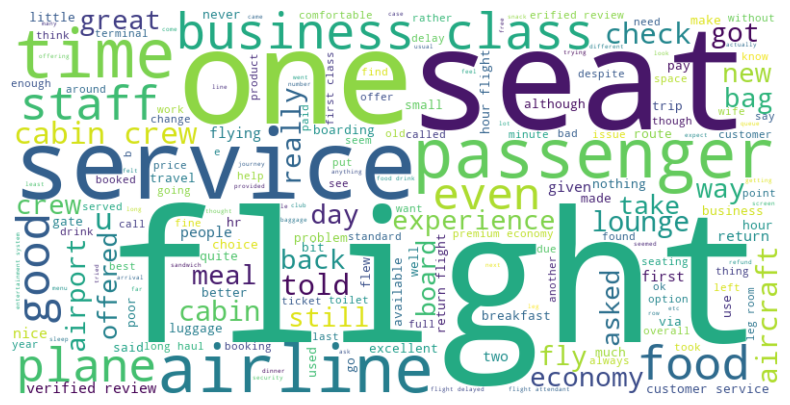

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Gabungkan semua teks dalam kolom 'Review_clean' menjadi satu teks
text = ' '.join(review['Review_clean'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [20]:
df

,Rating,Title,Author,Date,Country,Review,Aircraft,Type Of Traveller,Seat Type,Route,...,Recommended,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,Verification Status,Sentiment
0,8.0,"""stick to their cabin bag size limit""",4 reviews\n\n\n\nMichael Powell,2024-03-21,United Kingdom,| The flight was comfortable enough but with ...,A320,Solo Leisure,Economy Class,London Heathrow to Toulouse,...,yes,4.0,4.0,3.0,3,NaN,NaN,NaN,Not Verified,Negative
1,8.0,"""crew were attentive, friendly""",N Wardan,2024-03-21,Canada,| We had a really good flying experience with...,Boeing 787-8 /777-200 / A320-200,Family Leisure,Economy Class,Montreal to Venice via London Heathrow,...,yes,4.0,5.0,3.0,4,5.0,4.0,NaN,Trip Verified,Positive
2,3.0,"""Utterly outrageous""",Solomon Pachtinger,2024-03-19,United Kingdom,| Waited an hour to check-in at the Paphos bu...,A321,Business,Business Class,Paphos to London,...,no,2.0,1.0,1.0,1,2.0,1.0,2.0,Trip Verified,Negative
3,3.0,"""They have a long way to go""",Paul Roberts,2024-03-19,Singapore,"| Not a great experience at all, from the ou...",Boeing 777-300,Business,Business Class,London to Houston,...,no,1.0,3.0,1.0,1,3.0,2.0,2.0,Not Verified,Negative
4,7.0,"""FA's were friendly""",42 reviews\n\n\n\nE Carmere,2024-03-14,Belgium,| Boarding was difficult caused by vast major...,A320,Solo Leisure,Business Class,London Heathrow to Brussels,...,yes,2.0,4.0,3.0,3,3.0,NaN,NaN,Trip Verified,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,1.0,British Airways customer review,J Robertson,2012-08-29,United Kingdom,This was a bmi Regional operated flight on a R...,NaN,NaN,Economy Class,NaN,...,no,3.0,1.0,NaN,3,2.0,0.0,NaN,Not Verified,Neutral
3767,9.0,British Airways customer review,Nick Berry,2012-08-28,United Kingdom,LHR to HAM. Purser addresses all club passenge...,NaN,NaN,Business Class,NaN,...,yes,4.0,5.0,NaN,3,4.0,0.0,NaN,Not Verified,Positive
3768,5.0,British Airways customer review,Avril Barclay,2011-10-12,United Kingdom,My son who had worked for British Airways urge...,NaN,NaN,Economy Class,NaN,...,yes,NaN,NaN,NaN,4,NaN,NaN,NaN,Not Verified,Positive
3769,4.0,British Airways customer review,C Volz,2011-10-11,United States,London City-New York JFK via Shannon on A318 b...,NaN,NaN,Premium Economy,NaN,...,no,1.0,3.0,NaN,1,5.0,0.0,NaN,Not Verified,Positive
